In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# importing the dataset
dataset = pd.read_csv("data.csv")
dataset.isnull().any()

ID                  False
name                 True
category            False
main_category       False
currency            False
deadline            False
goal                False
launched            False
pledged             False
state               False
backers             False
country             False
usd pledged          True
usd_pledged_real    False
usd_goal_real       False
dtype: bool

After analyzing the data, there were a few Nan values found. So the rows with Nan were removed beforehand.

In [5]:
# removing rows with NaN values
dataset = dataset.dropna()
dataset.isnull().any()

ID                  False
name                False
category            False
main_category       False
currency            False
deadline            False
goal                False
launched            False
pledged             False
state               False
backers             False
country             False
usd pledged         False
usd_pledged_real    False
usd_goal_real       False
dtype: bool

After analyzing the features a new feature was added which was the number of days between the launch and the deadline. This feature is used in the model in place of 'launched' and 'deadline'.

In [6]:
# caluclating the number of days it took for completion of each project
dataset['launched'] = pd.to_datetime(dataset['launched'])
dataset['deadline'] = pd.to_datetime(dataset['deadline'])
days = (dataset['deadline'] - dataset['launched'])
dataset['days'] = days.astype('timedelta64[D]')
X = dataset.iloc[:, [2, 3, 4, 6, 8, 10,12, 13, 14, 15]].values
y = dataset.iloc[:, 9].values

The dependent variable is made binary. Only the projects with 'successful' states are converted to 1, rest all states are asumed to be failed state and converted to 0.

In [7]:
# data preprocessing
# Encoding the Dependent Variable
y[y == 'successful'] = 1
y[y != 1] = 0
y = y.astype(float)

To deal with the high cardinality of the categorical data, One-hot encoding wouldn't have been a good option. So, impact/target encoding is used to transform the categorical data in three columns of 'category', 'main_category' and 'currency'.

In [8]:
# Encoding categorical data
import category_encoders as ce
encoder = ce.TargetEncoder(X)
encoder.fit(X, y)
X = encoder.transform(X)

The data is split into train and test data to see the correct accuracy of the model.

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


Since we are given sufficient amoount of data to train the model, I decided on using an Artificial Neural Network. This ANN consists of three layers (1 input, 1 output, 1 hidden layer). The value for batch_size and epoch is decided based on multiple runs of the code. The ANN is trained on the 80% of the dataset reserved as training set. We can see the training set accuracy in the end of this cell.

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

/Users/ishaMac/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
#Dense function is used to add a fully connected layer in ANN
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
classifier.add(Dropout(p = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(p = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X, y, batch_size = 10, epochs = 20)


/Users/ishaMac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  import sys
/Users/ishaMac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/20
374860/374860 [==============================] - 95s 253us/step - loss: 0.1010 - acc: 0.9860
Epoch 2/20
374860/374860 [==============================] - 105s 279us/step - loss: 0.0780 - acc: 0.9911
Epoch 3/20
374860/374860 [==============================] - 89s 237us/step - loss: 0.0768 - acc: 0.9918
Epoch 4/20
374860/374860 [==============================] - 90s 241us/step - loss: 0.0716 - acc: 0.99260s - loss: 0.0717 - 
Epoch 5/20
374860/374860 [==============================] - 92s 245us/step - loss: 0.0711 - acc: 0.9927
Epoch 6/20
374860/374860 [==============================] - 90s 240us/step - loss: 0.0713 - acc: 0.9930
Epoch 7/20
374860/374860 [==============================] - 89s 239us/step - loss: 0.0677 - acc: 0.9934
Epoch 8/20
374860/374860 [==============================] - 91s 241us/step - loss: 0.0670 - acc: 0.9934
Epoch 9/20
374860/374860 [==============================] - 90s 241us/step - loss: 0.0687 - acc: 0.9930
Epoch 10/20
374860/374860 [================

The accuracy for all the epochs is above 98%. This could be because of overfitting. Let's check the accuracy for test set. 
20% of the dataset was reserved as test set to calculate the test set accuracy. 

Confusion Matrix:
[[48127   318]
 [    0 26527]]
Accuracy:
0.9957584164754841
Precision, Recall, F-1 Score, Support for both the classses:
(array([1.        , 0.98815422]), array([0.99343586, 1.        ]), array([0.99670712, 0.99404182]), array([48445, 26527]))


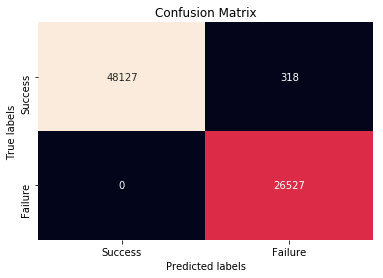

In [21]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt  
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
print('Accuracy:')
print(accuracy_score(y_test, y_pred))
print('Precision, Recall, F-1 Score, Support for both the classses:')
print(precision_recall_fscore_support(y_test, y_pred))

# plotting the Confusion Matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt = "d", ax = ax, cbar = False); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Success', 'Failure']); ax.yaxis.set_ticklabels(['Success', 'Failure']);

As we can see that we are getting an Accuracy of 99.5% on the test set. We can say that our model is working pretty on both Training and Test set and we can be sure that there is no overfitting.

This code is used just to check the accuracy of the model when it is restored from it's pickle file.

In [78]:
import pickle
from keras.models import load_model

classifier.save('model.pkl')
classifier = load_model('model.pkl')


In [79]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
print('Accuracy:')
print(accuracy_score(y_test, y_pred))
print('Precision, Recall, F-1 Score, Support for both the classses:')
print(precision_recall_fscore_support(y_test, y_pred))


Confusion Matrix:
[[48074   371]
 [    1 26526]]
Accuracy:
0.9950381475750947
Precision, Recall, F-1 Score, Support for both the classses:
(array([0.9999792 , 0.98620664]), array([0.99234183, 0.9999623 ]), array([0.99614588, 0.99303684]), array([48445, 26527]))
